In [ ]:
!sudo apt install tesseract-ocr libtesseract-dev libleptonica-dev pkg-config
!pip install pytesseract
!pip install tesserocr
!pip install matplotlib
!pip install opencv-python
!pip install gcsfs

/bin/bash: $: command not found


In [ ]:
#making the necessary imports
import pytesseract
import cv2
import re
from pytesseract import image_to_string
from PIL import Image
import pandas as pd
import numpy as np
import gcsfs
from tesserocr import *
import io
import matplotlib.pyplot as plt
import locale
locale.setlocale(locale.LC_ALL, 'C')

'C'

In [ ]:
#uploading an image into colab
from google.colab import files
uploaded = files.upload()

Saving image.png to image.png


# Extract and Print


In [ ]:
# no config option 1
image_path = "image.png"
extractedInformation = image_to_string(Image.open(image_path))
print(extractedInformation.strip())

® unified

 

Insertion Order | THD & Unified

FY22 Q4 Bath Remodelers Base
PO# 9017674886
Dept: THD Remodelers
Flight Dates: 10.31.22 - 01.29.23
Total Media: $260,861.79
Total Fee: $18,260.32
Total Advertiser Cost: $279,122.11

Addresses and contacts for notices

 

“The Home Depot” “Unified”
Company Name: The Home Depot

 

Company Name: Unified, Inc

 

Primary Contact: Allan Lansche Primary Contact: Bridget Enselein

 

 

Address: Address:
2455 Paces Ferry Road SE 125 West 55th Street 7th Floor
Atlanta, GA 30339 NY, NY 10019
Phone number: 404.558.8636 | Phone number: n/a
Email: ALLAN _LANSCHE @homedepot.com | Email: Bridget@ unified.com
Campaign Details
Platform Base Campaign Name pe. part pre nee Media Cost | Fee Cost Advertiser

Cost

 

PSOC-BF-ARM-PIN-Multi-Multi-NA-NA-NA-
UNI-3384400-RBA-TRF-FY22-

Pinterest Base Q4_BCON_DIGITALDESIGNERSRESEARCH_SM_ CPC 10.31.22 1.29.23 T% $36,520.64 $2,556.45 $39,077.09
AON_ STANDARD
PSOC-BF-ARM-PIN-Multi-Multi-NA-NA-NA-
. UNI-3384400-RBA-TR

# Different Types of Processing

In [ ]:
def show_image(img, title=""):
    plt.figure(figsize=(20,88))
    plt.imshow(img)
    plt.title(title)
    plt.show()

# Accepts either a local file
def imread_wrapper(uri):
    if uri.startswith("gs://"):
        with gcsfs.GCSFileSystem().open(uri, "rb") as f:
            arr = np.asarray(bytearray(f.read()), dtype="uint8")
            img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
            return img
    else: # Assume local file
        return cv2.imread(uri, cv2.IMREAD_COLOR)


tesseract_modes = [
    ("Tesseract AUTO", PyTessBaseAPI(psm=PSM.AUTO)),
    ("Tesseract SINGLE BLOCK", PyTessBaseAPI(psm=PSM.SINGLE_BLOCK)),
    ("Tesseract SPARSE TEXT", PyTessBaseAPI(psm=PSM.SPARSE_TEXT)),
    ("Tesseract SINGLE COLUMN", PyTessBaseAPI(psm=PSM.SINGLE_COLUMN))
]

def tesseract_ocr(tesseract, img):
    pil_image = Image.fromarray(img)
    tesseract.SetImage(pil_image)
    tesseract.Recognize()
    return tesseract.GetIterator()

def display_tesseract_results(img, level):
    n = len(tesseract_modes)
    fig, axs = plt.subplots(1,n, figsize=(10*n, 88))
    for (name, tesseract), ax in zip(tesseract_modes, axs):
        results = tesseract_ocr(tesseract, img)
        _img = img.copy()
        tokens = []
        for r in iterate_level(results, level):
            text = r.GetUTF8Text(level)
            tokens += [text]
            bb = r.BoundingBox(level)
            cv2.rectangle(_img, (bb[0], bb[1]), (bb[2], bb[3]), (255, 0, 0), 2)
        print(name)
        print(tokens)
        print()
        ax.set_title(name)
        ax.imshow(_img)

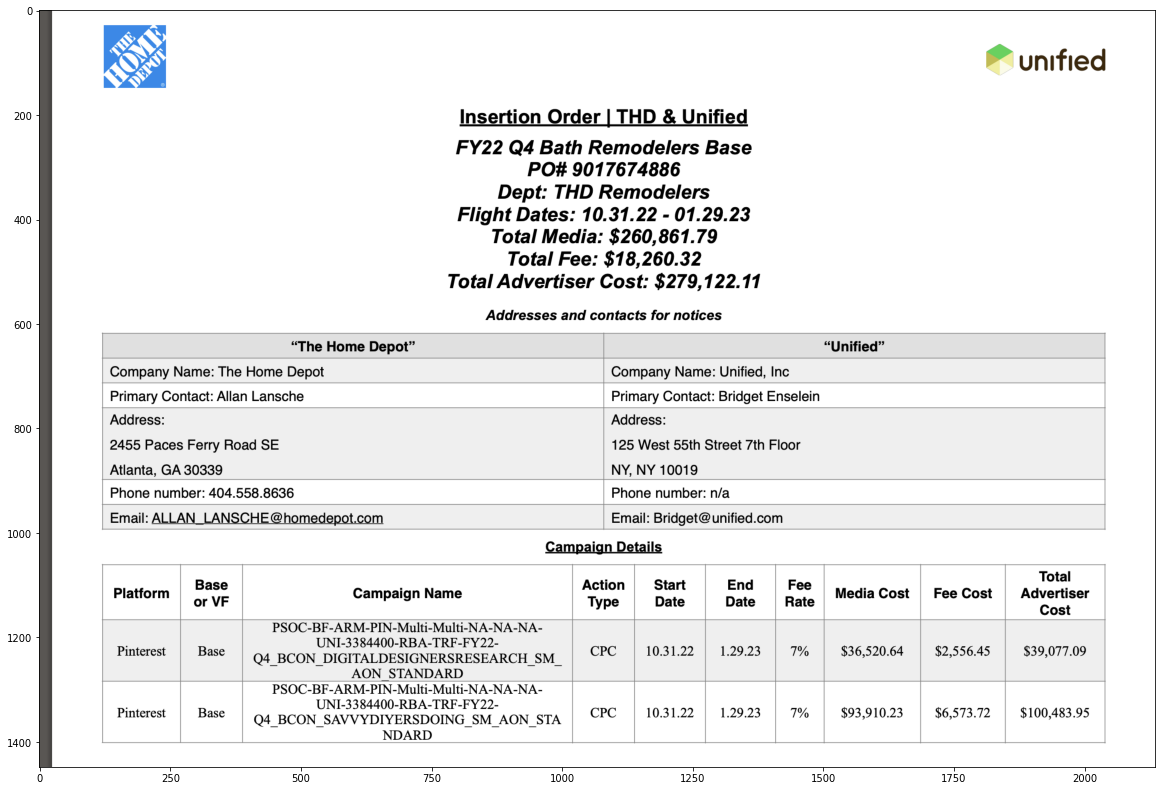

In [ ]:
PERFORM_THRESHOLDING = False
img = imread_wrapper(image_path)
if PERFORM_THRESHOLDING:
    _, img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
show_image(img)

Tesseract AUTO
['® unified\n\n', ' \n\n', 'Insertion Order | THD & Unified\n\n', 'FY22 Q4 Bath Remodelers Base\nPO# 9017674886\nDept: THD Remodelers\nFlight Dates: 10.31.22 - 01.29.23\nTotal Media: $260,861.79\nTotal Fee: $18,260.32\nTotal Advertiser Cost: $279,122.11\n\n', 'Addresses and contacts for notices\n\n', ' \n\n', ' \n\n', ' \n\n', ' \n\n', ' \n\n', ' \n\n', ' \n\n', '“The Home Depot” “Unified”\nCompany Name: The Home Depot Company Name: Unified, Inc\nPrimary Contact: Allan Lansche Primary Contact: Bridget Enselein\nAddress: Address:\n2455 Paces Ferry Road SE 125 West 55th Street 7th Floor\nAtlanta, GA 30339 NY, NY 10019\nPhone number: 404.558.8636 | Phone number: n/a\nEmail: ALLAN_LANSCHE @homedepot.com | Email: Bridget@ unified.com\nCampaign Details\nPlatform Base Campaign Name pe. part pre nee Media Cost | Fee Cost adverse\nPSOC-BF-ARM-PIN-Multi-Multi-NA-NA-NA-\nPinterest Base Q CO Gri eee eee CPC 10.31.22 1.29.23 T% $36,520.64 $2,556.45 $39,077.09\nAON_ STANDARD\nPSOC-BF-

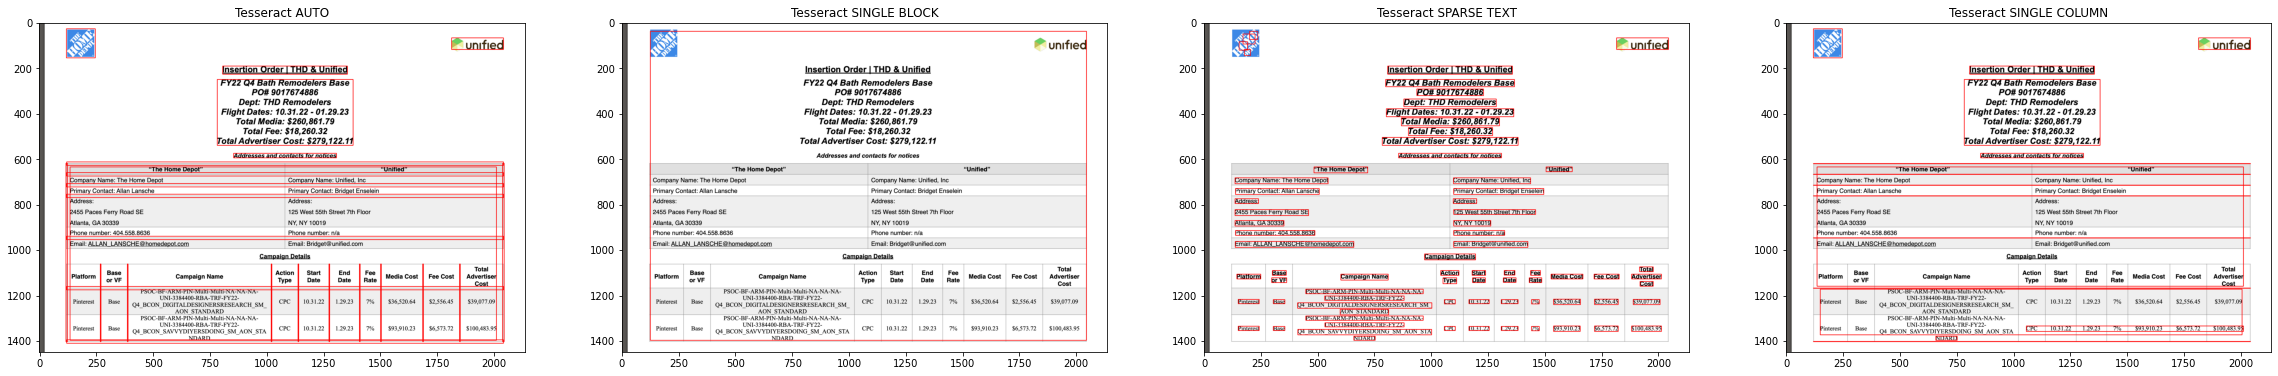

In [ ]:
# by paragraph
display_tesseract_results(img, RIL.PARA)

Tesseract AUTO
['® unified\n\n', ' \n\n', 'Insertion Order | THD & Unified\n\n', 'FY22 Q4 Bath Remodelers Base\n', 'PO# 9017674886\n', 'Dept: THD Remodelers\n', 'Flight Dates: 10.31.22 - 01.29.23\n', 'Total Media: $260,861.79\n', 'Total Fee: $18,260.32\n', 'Total Advertiser Cost: $279,122.11\n\n', 'Addresses and contacts for notices\n\n', ' \n\n', ' \n\n', ' \n\n', ' \n\n', ' \n\n', ' \n\n', ' \n\n', '“The Home Depot” “Unified”\n', 'Company Name: The Home Depot Company Name: Unified, Inc\n', 'Primary Contact: Allan Lansche Primary Contact: Bridget Enselein\n', 'Address: Address:\n', '2455 Paces Ferry Road SE 125 West 55th Street 7th Floor\n', 'Atlanta, GA 30339 NY, NY 10019\n', 'Phone number: 404.558.8636 | Phone number: n/a\n', 'Email: ALLAN_LANSCHE @homedepot.com | Email: Bridget@ unified.com\n', 'Campaign Details\n', 'Platform Base Campaign Name pe. part pre nee Media Cost | Fee Cost adverse\n', 'PSOC-BF-ARM-PIN-Multi-Multi-NA-NA-NA-\n', 'Pinterest Base Q CO Gri eee eee CPC 10.31.22

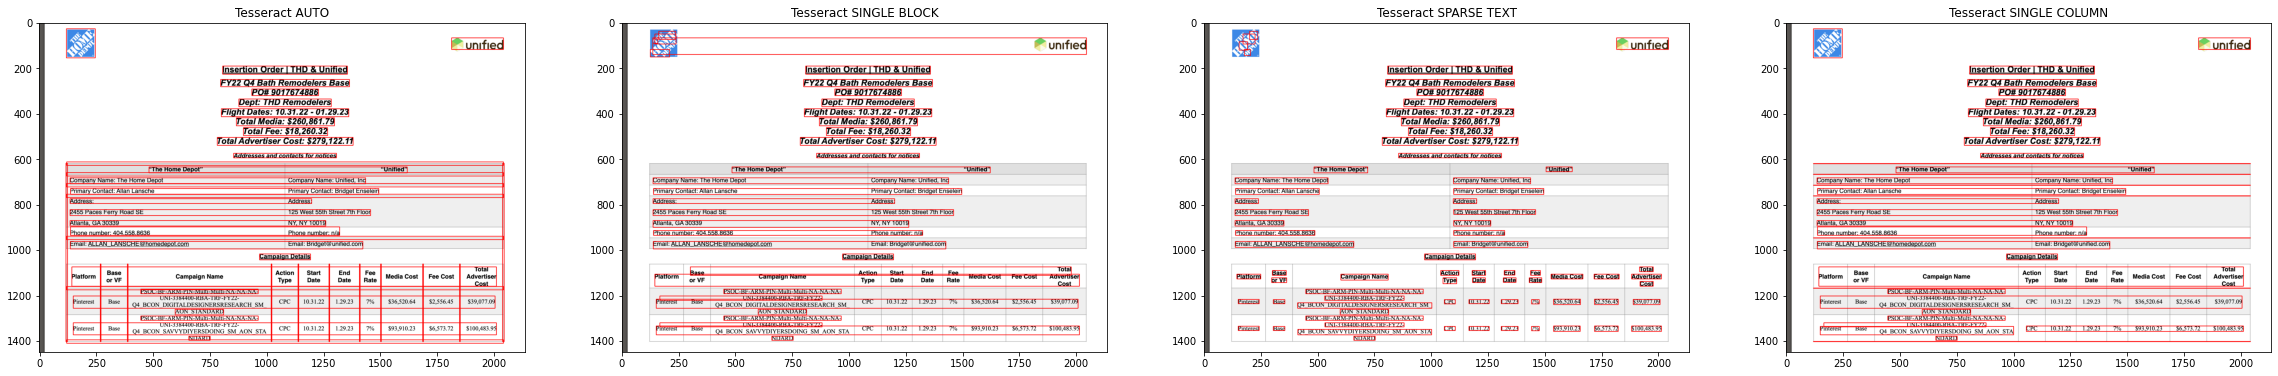

In [ ]:
# by text line
display_tesseract_results(img, RIL.TEXTLINE)

Tesseract AUTO
['®', 'unified', ' ', 'Insertion', 'Order', '|', 'THD', '&', 'Unified', 'FY22', 'Q4', 'Bath', 'Remodelers', 'Base', 'PO#', '9017674886', 'Dept:', 'THD', 'Remodelers', 'Flight', 'Dates:', '10.31.22', '-', '01.29.23', 'Total', 'Media:', '$260,861.79', 'Total', 'Fee:', '$18,260.32', 'Total', 'Advertiser', 'Cost:', '$279,122.11', 'Addresses', 'and', 'contacts', 'for', 'notices', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '“The', 'Home', 'Depot”', '“Unified”', 'Company', 'Name:', 'The', 'Home', 'Depot', 'Company', 'Name:', 'Unified,', 'Inc', 'Primary', 'Contact:', 'Allan', 'Lansche', 'Primary', 'Contact:', 'Bridget', 'Enselein', 'Address:', 'Address:', '2455', 'Paces', 'Ferry', 'Road', 'SE', '125', 'West', '55th', 'Street', '7th', 'Floor', 'Atlanta,', 'GA', '30339', 'NY,', 'NY', '10019', 'Phone', 'number:', '404.558.8636', '|', 'Phone', 'number:', 'n/a', 'Email:', 'ALLAN_LANSCHE', '@homedepot.com', '|', 'Email:', 'Bridget@', 'unified.com', 'Campaign', 'Details', 'Platform', 'Base', '

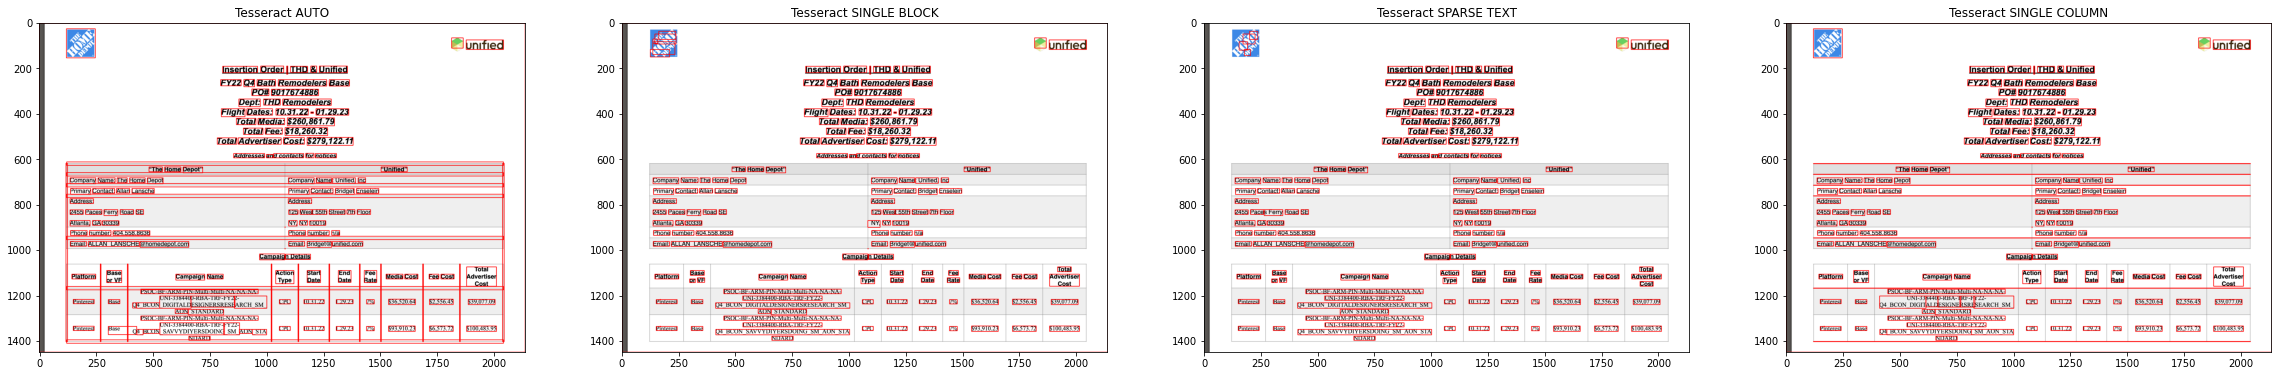

In [ ]:
# By word
display_tesseract_results(img, RIL.WORD)

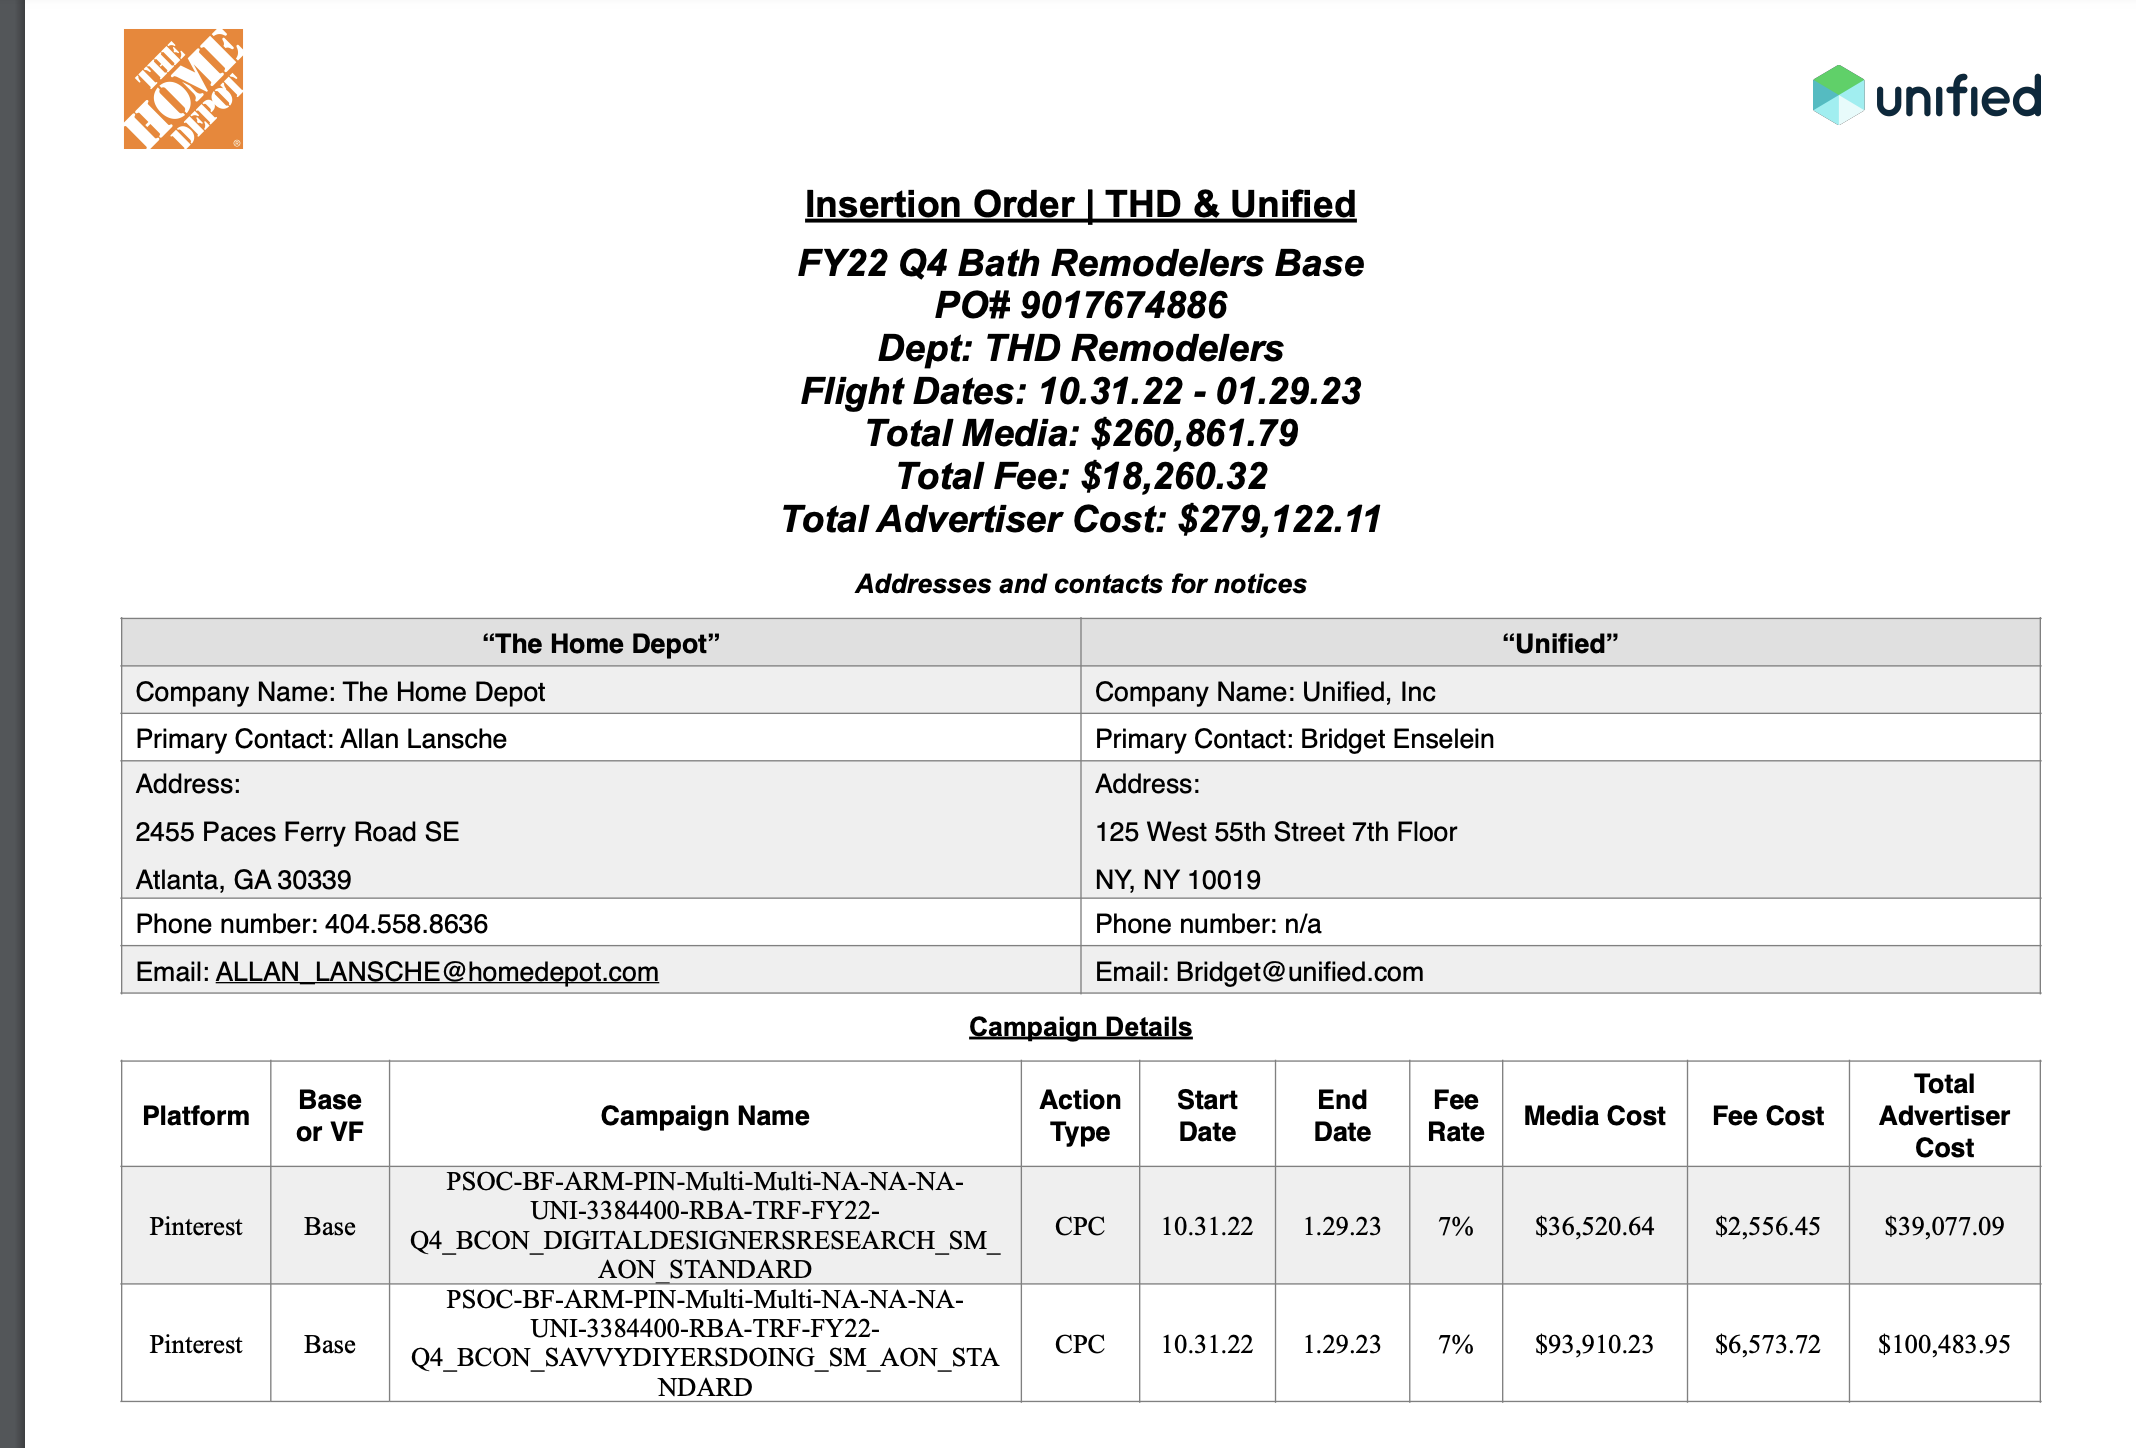

In [ ]:
Image.open(image_path)